## Preprocessing

In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive, files
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 

# uploaded = files.upload()

drive.mount('/content/drive')

!ls "/content/drive/My Drive/ML_Colab/21-Deep-Learning/Homework/Instructions"

application_df = pd.read_csv('/content/drive/My Drive/ML_Colab/21-Deep-Learning/Homework/Instructions/charity_data.csv')

application_df.head()


Mounted at /content/drive
AlphabetSoupCharity.h5			charity_data.csv  Starter_Code.ipynb
AlphabetSoupCharity_Optimization.h5	model.h5
AlphabetSoupCharity_Optimization.ipynb	README.md


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


# Preprocess the data for ML modeling

In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
data = application_df.drop(columns = ['EIN','NAME'])

In [5]:
# Determine the number of unique values in each column.
data.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
data['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

application_types_to_replace = ['T25', 'T14', 'T29', 'T15', 'T17', 'T2', 'T12']

# Replace in dataframe
for app in application_types_to_replace:
    data['APPLICATION_TYPE'] = data['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
data['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
Other       54
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
data['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
more_than_one = data['CLASSIFICATION'].value_counts().loc[lambda x : x>1]
more_than_one

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [10]:
grouped = data['CLASSIFICATION'].value_counts().loc[lambda x : x < 50]
grouped

C1230    36
C1400    34
C7200    32
C2300    32
C1240    30
C8000    20
C7120    18
C1500    16
C1800    15
C6000    15
C1250    14
C8200    11
C1238    10
C1278    10
C1235     9
C1237     9
C7210     7
C2400     6
C1720     6
C4100     6
C1257     5
C1600     5
C1260     3
C2710     3
C0        3
C3200     2
C1234     2
C1246     2
C1267     2
C1256     2
C2190     1
C4200     1
C2600     1
C5200     1
C1370     1
C1248     1
C6100     1
C1820     1
C1900     1
C1236     1
C3700     1
C2570     1
C1580     1
C1245     1
C2500     1
C1570     1
C1283     1
C2380     1
C1732     1
C1728     1
C2170     1
C4120     1
C8210     1
C2561     1
C4500     1
C2150     1
Name: CLASSIFICATION, dtype: int64

In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = grouped.index.to_list()
# Replace in dataframe
for cls in classifications_to_replace:
    data['CLASSIFICATION'] = data['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
data['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      391
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
Name: CLASSIFICATION, dtype: int64

In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
data = pd.get_dummies(data)

In [13]:
# Split our preprocessed data into our features and target arrays
X = data.drop(columns = ['IS_SUCCESSFUL'])
y = data['IS_SUCCESSFUL']
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [15]:
# check how many inputs we have
X.shape

(34299, 55)

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model = tf.keras.models.Sequential()

# hidden layers
nn_model.add(tf.keras.layers.Dense(units=25, activation="relu", input_dim=55))
nn_model.add(tf.keras.layers.Dense(units=25, activation="relu"))

# output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                1400      
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 2,076
Trainable params: 2,076
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = 'model_checkpoints/'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq=5,
    save_weights_only=True
    )

In [19]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs = 100, callbacks = [checkpoint])

Epoch 1/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5769 - accuracy: 0.7148
Epoch 2/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5537 - accuracy: 0.7302
Epoch 3/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5501 - accuracy: 0.7290
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5473 - accuracy: 0.7320
Epoch 5/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5459 - accuracy: 0.7326
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5451 - accuracy: 0.7335
Epoch 7/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5438 - accuracy: 0.7336
Epoch 8/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5430 - accuracy: 0.7345
Epoch 9/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5425 - accuracy: 0.7352
Epoch 10/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5422 - accura

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5769 - accuracy: 0.7259 - 429ms/epoch - 2ms/step
Loss: 0.5768680572509766, Accuracy: 0.7259474992752075


In [21]:
# Export our model to HDF5 file
nn_model.save("/content/drive/My Drive/ML_Colab/21-Deep-Learning/Homework/Instructions/AlphabetSoupCharity.h5") 

OPTIMIZING THE MODEL -- EXPERIMENTATION (FINALIZED HYPERPARAMETER SETTINGS CAN BE FOUND IN THE ADJACENT NOTEBOOK)

In [22]:
# try to optimize so that accuracy exceeds the .75 target. Per the previous cellblock, accuracy currently stands at 0.726

In [23]:
# set up tuner to optimize model

def create_model(hp):
    nn_model_opt = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model_opt.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=50,
        step=2), activation=activation, input_dim=55))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 50)):
        nn_model_opt.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=50,
            step=2),
            activation=activation))
    
    nn_model_opt.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model_opt.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model_opt

In [24]:
# Import the kerastuner library
!pip install -q -U keras-tuner
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    overwrite = True,
    hyperband_iterations=2)

     |████████████████████████████████| 98 kB 3.7 MB/s 


In [25]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 01m 14s]
val_accuracy: 0.5255976915359497

Best val_accuracy So Far: 0.7297959327697754
Total elapsed time: 00h 34m 43s
INFO:tensorflow:Oracle triggered exit


In [26]:
# Get top 3 model hyperparameters and print the values
top_hyper = tuner.get_best_hyperparameters(3)
for param in top_hyper:
    print(param.values)

{'activation': 'tanh', 'first_units': 29, 'num_layers': 8, 'units_0': 25, 'units_1': 25, 'units_2': 45, 'units_3': 37, 'units_4': 19, 'units_5': 5, 'units_6': 29, 'units_7': 47, 'units_8': 11, 'units_9': 21, 'units_10': 45, 'units_11': 27, 'units_12': 13, 'units_13': 17, 'units_14': 5, 'units_15': 31, 'units_16': 15, 'units_17': 47, 'units_18': 31, 'units_19': 15, 'units_20': 15, 'units_21': 25, 'units_22': 37, 'units_23': 13, 'units_24': 35, 'units_25': 27, 'units_26': 45, 'units_27': 21, 'units_28': 3, 'units_29': 31, 'units_30': 47, 'units_31': 41, 'units_32': 43, 'units_33': 49, 'units_34': 1, 'units_35': 27, 'units_36': 41, 'units_37': 17, 'units_38': 17, 'units_39': 39, 'units_40': 31, 'units_41': 43, 'units_42': 43, 'units_43': 3, 'units_44': 37, 'units_45': 17, 'units_46': 17, 'units_47': 7, 'units_48': 1, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '2122976eb7d0f3a10944fad30d6274f3'}
{'activation': 'tanh', 'first_units'

In [27]:
# Evaluate the top 3 models against the test dataset
top_model = tuner.get_best_models(3)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5532 - accuracy: 0.7298 - 602ms/epoch - 2ms/step
Loss: 0.5531752705574036, Accuracy: 0.7297959327697754
268/268 - 1s - loss: 0.5663 - accuracy: 0.7282 - 561ms/epoch - 2ms/step
Loss: 0.5663350224494934, Accuracy: 0.7281632423400879
268/268 - 1s - loss: 0.5700 - accuracy: 0.7279 - 526ms/epoch - 2ms/step
Loss: 0.569952130317688, Accuracy: 0.7279300093650818


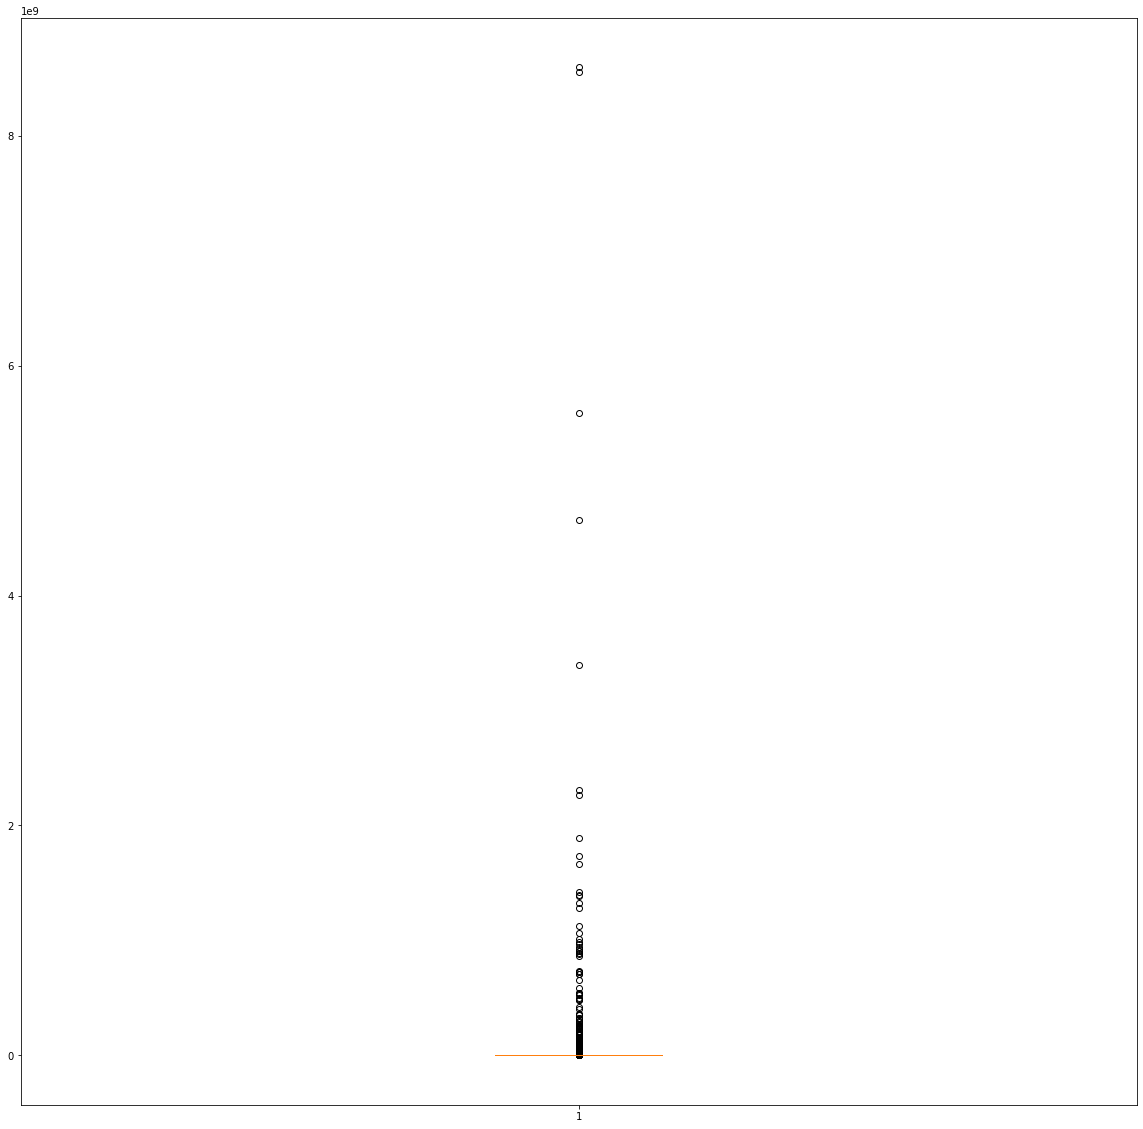

In [28]:
# We can see that the best validation accuracy os far (from above) is 0.73. It may be useful to check if there are outliers in the data that can be removed...
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20))
plt.boxplot(data['ASK_AMT'])
plt.show()

In [29]:
# finding the 1st quartile
import numpy as np
q1 = np.quantile(data['ASK_AMT'], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(data['ASK_AMT'], 0.75)
med = np.median(data['ASK_AMT'])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

2742.0 11855.0 887.0


In [30]:
data['ASK_AMT'].value_counts()

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [31]:
rare_amts = data['ASK_AMT'].value_counts().loc[lambda x : x ==1]
rare_amts.sort_index()
# rare_amts.sort_index(ascending = True).index.to_list()
# rare_amts.sort_index(ascending = False).index.to_list()
# there appear to be a handful of applications that only occur once and have request amounts that exceed 1 billion. Let's try removing them to see if that can improve model performance

5001          1
5016          1
5037          1
5040          1
5044          1
             ..
3391919220    1
4653011914    1
5591584994    1
8556638692    1
8597806340    1
Name: ASK_AMT, Length: 8595, dtype: int64

In [32]:
data = data.loc[data['ASK_AMT'] < 1000000000]
data

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1270,CLASSIFICATION_C1280,CLASSIFICATION_C1300,CLASSIFICATION_C1700,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C2700,CLASSIFICATION_C2800,CLASSIFICATION_C3000,CLASSIFICATION_C4000,CLASSIFICATION_C5000,CLASSIFICATION_C7000,CLASSIFICATION_C7100,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [33]:
# Now let's try optimizing the model again

# Split our preprocessed data into our features and target arrays again
X = data.drop(columns = ['IS_SUCCESSFUL'])
y = data['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset again
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [34]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [35]:
#refit the model to new data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs = 100, callbacks = [checkpoint])

Epoch 1/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5403 - accuracy: 0.7373
Epoch 2/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5358 - accuracy: 0.7382
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5355 - accuracy: 0.7382
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5344 - accuracy: 0.7386
Epoch 5/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5345 - accuracy: 0.7388
Epoch 6/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5338 - accuracy: 0.7385
Epoch 7/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5339 - accuracy: 0.7384
Epoch 8/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5339 - accuracy: 0.7375
Epoch 9/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5336 - accuracy: 0.7394
Epoch 10/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5333 - accura

In [ ]:
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 72 Complete [00h 01m 23s]
val_accuracy: 0.7331699728965759

Best val_accuracy So Far: 0.735270082950592
Total elapsed time: 00h 55m 10s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.search(X_train_scaled,y_train,epochs=50,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 56s]
val_accuracy: 0.7339866757392883

Best val_accuracy So Far: 0.7356201410293579
Total elapsed time: 00h 26m 24s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.search(X_train_scaled,y_train,epochs=50,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 01m 26s]
val_accuracy: 0.5292264819145203

Best val_accuracy So Far: 0.7360867857933044
Total elapsed time: 00h 35m 59s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [ ]:
# cutting out the high-flying outliers, increasing number of epochs and maximum number of neuron layers has improved performance, 
# but not enough to reach the threshold
# let's try playing around with different filters to reduce outliers, but not by too much (cuts too much into the data)
new_data = data.loc[data['ASK_AMT'] < 100000]
new_data['ASK_AMT'].value_counts().sort_index()

5000     25398
5001         1
5006         2
5016         1
5037         1
         ...  
99821        1
99859        1
99877        1
99879        1
99982        1
Name: ASK_AMT, Length: 4230, dtype: int64

In [ ]:
# Now let's try optimizing the model and experimenting with different hyper parameters again (in the cells to follow)

# Split our preprocessed data into our features and target arrays again
X = new_data.drop(columns = ['IS_SUCCESSFUL'])
y = new_data['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset again
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
#refit the model to new data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs = 200, callbacks = [checkpoint])

Epoch 1/200
698/698 [==============================] - 4s 6ms/step - loss: 0.5469 - accuracy: 0.7406
Epoch 2/200
698/698 [==============================] - 4s 5ms/step - loss: 0.5305 - accuracy: 0.7444
Epoch 3/200
698/698 [==============================] - 3s 5ms/step - loss: 0.5273 - accuracy: 0.7471
Epoch 4/200
698/698 [==============================] - 3s 5ms/step - loss: 0.5257 - accuracy: 0.7469
Epoch 5/200
698/698 [==============================] - 4s 5ms/step - loss: 0.5241 - accuracy: 0.7474
Epoch 6/200
698/698 [==============================] - 3s 5ms/step - loss: 0.5237 - accuracy: 0.7479
Epoch 7/200
698/698 [==============================] - 3s 5ms/step - loss: 0.5228 - accuracy: 0.7491
Epoch 8/200
698/698 [==============================] - 4s 5ms/step - loss: 0.5230 - accuracy: 0.7491
Epoch 9/200
698/698 [==============================] - 4s 5ms/step - loss: 0.5212 - accuracy: 0.7494
Epoch 10/200
698/698 [==============================] - 4s 5ms/step - loss: 0.5210 - accura

In [ ]:
# re-run the hp setup 

# def create_model(hp):
#     nn_model_opt = tf.keras.models.Sequential()

#     # Allow kerastuner to decide which activation function to use in hidden layers
#     activation = hp.Choice('activation',['relu','tanh'])
    
#     # Allow kerastuner to decide number of neurons in first layer
#     nn_model_opt.add(tf.keras.layers.Dense(units=hp.Int('first_units',
#         min_value=1,
#         max_value=50,
#         step=2), activation=activation, input_dim=55))

#     # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
#     for i in range(hp.Int('num_layers', 1, 50)):
#         nn_model_opt.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
#             min_value=1,
#             max_value=50,
#             step=2),
#             activation=activation))
    
#     nn_model_opt.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

#     # Compile the model
#     nn_model_opt.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
#     return nn_model_opt

In [ ]:
# Import the kerastuner library
# !pip install -q -U keras-tuner
# import keras_tuner as kt

# tuner = kt.Hyperband(
#     create_model,
#     objective="val_accuracy",
#     max_epochs=20,
#     overwrite = True,
#     hyperband_iterations=2)

In [ ]:
# re-run tuner search to look for the best hps (I prematurely stopped the run because one of the trials already passed the 75th percent benchmark)
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 31 Complete [00h 00m 22s]
val_accuracy: 0.5223058462142944

Best val_accuracy So Far: 0.7542327046394348
Total elapsed time: 00h 20m 59s

Search: Running Trial #32

Hyperparameter    |Value             |Best Value So Far 
activation        |relu              |tanh              
first_units       |31                |33                
num_layers        |27                |18                
units_0           |7                 |43                
units_1           |13                |15                
units_2           |9                 |9                 
units_3           |43                |15                
units_4           |49                |33                
units_5           |49                |45                
units_6           |37                |5                 
units_7           |49                |11                
units_8           |23                |17                
units_9           |39                |17                
units_10          |43          

KeyboardInterrupt: ignored

In [ ]:
# this experimentation will be finalized in the adjacent notebook